# Centroid Node
1 -> 1

Documentation: https://toblerity.org/shapely/manual.html#object.centroid

In [ ]:
###
### HEADER
###
import geopandas as gpd
import pandas as pd
from shapely import wkt as WKT

# geopandas (geometry) to pandas (wkt)
def gdfToDf(gdf):
    df = pd.DataFrame(gdf, copy=True)
    df['wkt'] = gdf.geometry.apply(lambda wkt: WKT.dumps(wkt, trim=True))
    df.drop(columns='geometry', inplace=True)
    return df

# pandas (wkt) to geopandas (geometry)
def dfToGdf(df):
    gdf = gpd.GeoDataFrame(df, copy=True)
    gdf['geometry'] = df.wkt.apply(WKT.loads)
    gdf.drop(columns='wkt', inplace=True)
    return gdf

In [3]:
###
### CENTROID NODE
###

# input
gdf = dfToGdf(input_table)
print('Shape input_table:', input_table.shape)

# calculate centroids. Note: this overwrites the current geometry column
gdf.geometry = gdf.geometry.centroid

# output
output_table = gdfToDf(gdf)
print('Shape output_table:', output_table.shape)

Shape input_table: (380, 4)

Shape output_table: (380, 4)

Preview:
    id  code      gemeentena                                             wkt
0   1  0584  Oud-Beijerland  POINT (4.4136756535309969 51.8106503024807097)
1  18  0160      Hardenberg  POINT (6.5746849551465454 52.5866812435935600)
2  19  0327         Leusden  POINT (5.4169021586168773 52.1232043704452082)
3  20  1931  Krimpenerwaard  POINT (4.7375678917325441 51.9533572586894721)
4  21  1701      Westerveld  POINT (6.2961030924723502 52.8392726421496803)


In [ ]:
###
### FOOTER
###
print('Preview output_table (first 5 rows):')
try:
    # try pretty print in Jupyter Notebook
    display(output_table.head())
except NameError:
    print(output_table.head())

## Testing and showing results
Don't add this in KNIME

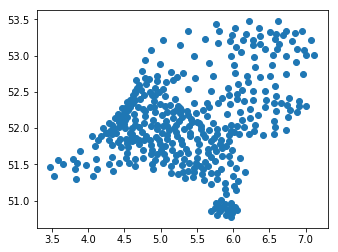

In [4]:
%matplotlib inline
gdf.plot()

## Load some input data to test the cells above

In [122]:
###
### SOURCE - ONLY FOR PREPARATION
###
from os.path import join
folder = '/home/ab/i/Open-data/shapefiles/shp-provincie'
filename = 'provincie-grenzen.shp'

# read the file
gdf = gpd.read_file( join(folder, filename) )
gdf = gdf.to_crs(epsg=4326)    # WGS84

# output
output_table = gdfToDf(gdf)

# copy output to input
input_table = output_table.copy()